In [1]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
metrics_list = ["ml_ade", "ml_fde", "nll_mean", "min_ade_5", "min_ade_10"]

AXHLINE_COLORS = {
    "Base": "#DD9787",
    "K0": "#A6C48A",
    "Oracle": "#A2999E"
}

SEABORN_PALETTE = {
    "Finetune": "#AA7C85",
    "K0": "#A6C48A",
    "Ours+Finetune": "#2D93AD",
    "Ours": "#9F9FED",
    "Base": "#DD9787",
    "K0+Finetune": "#67934D",
    "Oracle": "#A2999E"
}

### Pedestrians D2D

In [3]:
eval_df = pd.read_csv("pedestrians/results/kf_d2d_evaluation.csv")
eval_df.head()

,model,scene_from,scene_to,ml_ade,ml_fde,scene_from_to
0,T-GNN,eth,hotel,1.13,2.18,eth -> hotel
1,T-GNN,eth,univ,1.25,2.25,eth -> univ
2,T-GNN,eth,zara1,0.94,1.78,eth -> zara1
3,T-GNN,eth,zara2,1.03,1.84,eth -> zara2
4,T-GNN,hotel,eth,2.54,4.15,hotel -> eth


In [4]:
eval_df["scene_from"] = eval_df["scene_from"].str.replace("eth","A").replace("hotel","B").replace("univ","C").replace("zara1","D").replace("zara2","E")
eval_df["scene_to"] = eval_df["scene_to"].str.replace("eth","A").replace("hotel","B").replace("univ","C").replace("zara1","D").replace("zara2","E")
eval_df["scene_from_to"] = eval_df["scene_from"] + "2" + eval_df["scene_to"]

In [5]:
d2d_ade_df = eval_df.pivot(index='model', columns='scene_from_to', values='ml_ade').loc[["T-GNN", "K0", "Ours"]]
d2d_ade_df["AVG"] = d2d_ade_df.mean(axis=1)

In [6]:
d2d_ade_df

scene_from_to,A2B,A2C,A2D,A2E,B2A,B2C,B2D,B2E,C2A,C2B,...,C2E,D2A,D2B,D2C,D2E,E2A,E2B,E2C,E2D,AVG
model,,,,,,,,,,,,,,,,,,,,,
T-GNN,1.130000,1.250000,0.940000,1.030000,2.540000,1.080000,2.250000,1.410000,0.970000,0.540000,...,0.230000,0.880000,0.780000,0.590000,0.320000,0.870000,0.720000,0.650000,0.340000,0.956500
K0,0.450565,0.783605,0.678041,0.589576,0.867430,0.648582,0.488052,0.356956,1.077197,0.461979,...,0.364456,1.134528,0.556364,0.585757,0.531506,1.130431,0.391945,0.589091,0.482572,0.630200
Ours,0.358830,0.641366,0.529044,0.447922,0.902197,0.618456,0.499648,0.358829,1.111280,0.460815,...,0.420896,1.108911,0.523334,0.544512,0.470462,1.049256,0.335032,0.559330,0.444368,0.593199


In [7]:
s = d2d_ade_df.style.format(precision=2)
s.highlight_min(props='bfseries:;')
print(s.to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrr}
scene_from_to & A2B & A2C & A2D & A2E & B2A & B2C & B2D & B2E & C2A & C2B & C2D & C2E & D2A & D2B & D2C & D2E & E2A & E2B & E2C & E2D & AVG \\
model &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
T-GNN & 1.13 & 1.25 & 0.94 & 1.03 & 2.54 & 1.08 & 2.25 & 1.41 & \bfseries 0.97 & 0.54 & 0.61 & \bfseries 0.23 & \bfseries 0.88 & 0.78 & 0.59 & \bfseries 0.32 & \bfseries 0.87 & 0.72 & 0.65 & \bfseries 0.34 & 0.96 \\
K0 & 0.45 & 0.78 & 0.68 & 0.59 & \bfseries 0.87 & 0.65 & \bfseries 0.49 & \bfseries 0.36 & 1.08 & 0.46 & \bfseries 0.44 & 0.36 & 1.13 & 0.56 & 0.59 & 0.53 & 1.13 & 0.39 & 0.59 & 0.48 & 0.63 \\
Ours & \bfseries 0.36 & \bfseries 0.64 & \bfseries 0.53 & \bfseries 0.45 & 0.90 & \bfseries 0.62 & 0.50 & 0.36 & 1.11 & \bfseries 0.46 & 0.48 & 0.42 & 1.11 & \bfseries 0.52 & \bfseries 0.54 & 0.47 & 1.05 & \bfseries 0.34 & \bfseries 0.56 & 0.44 & \bfseries 0.59 \\
\end{tabular}



In [8]:
d2d_fde_df = eval_df.pivot(index='model', columns='scene_from_to', values='ml_fde').loc[["T-GNN", "K0", "Ours"]]
d2d_fde_df["AVG"] = d2d_fde_df.mean(axis=1)

In [9]:
d2d_fde_df

scene_from_to,A2B,A2C,A2D,A2E,B2A,B2C,B2D,B2E,C2A,C2B,...,C2E,D2A,D2B,D2C,D2E,E2A,E2B,E2C,E2D,AVG
model,,,,,,,,,,,,,,,,,,,,,
T-GNN,2.180000,2.250000,1.780000,1.840000,4.150000,1.820000,4.040000,2.530000,1.910000,1.120000,...,0.870000,1.920000,1.460000,1.25000,0.650000,1.860000,1.450000,1.280000,0.720000,1.819000
K0,0.939737,1.724473,1.507142,1.290457,1.807124,1.329284,1.017189,0.749638,2.168531,0.910763,...,0.808705,2.175130,0.983776,1.19503,1.026290,2.124348,0.682213,1.216268,1.033150,1.281358
Ours,0.690987,1.337723,1.120063,0.914324,1.849197,1.272241,1.050430,0.764424,2.262436,0.917955,...,0.939497,2.233664,1.024661,1.17108,0.998629,2.072223,0.634853,1.187044,0.942013,1.220530


In [10]:
s = d2d_fde_df.style.format(precision=2)
s.highlight_min(props='bfseries:;')
print(s.to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrr}
scene_from_to & A2B & A2C & A2D & A2E & B2A & B2C & B2D & B2E & C2A & C2B & C2D & C2E & D2A & D2B & D2C & D2E & E2A & E2B & E2C & E2D & AVG \\
model &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
T-GNN & 2.18 & 2.25 & 1.78 & 1.84 & 4.15 & 1.82 & 4.04 & 2.53 & \bfseries 1.91 & 1.12 & 1.30 & 0.87 & \bfseries 1.92 & 1.46 & 1.25 & \bfseries 0.65 & \bfseries 1.86 & 1.45 & 1.28 & \bfseries 0.72 & 1.82 \\
K0 & 0.94 & 1.72 & 1.51 & 1.29 & \bfseries 1.81 & 1.33 & \bfseries 1.02 & \bfseries 0.75 & 2.17 & \bfseries 0.91 & \bfseries 0.94 & \bfseries 0.81 & 2.18 & \bfseries 0.98 & 1.20 & 1.03 & 2.12 & 0.68 & 1.22 & 1.03 & 1.28 \\
Ours & \bfseries 0.69 & \bfseries 1.34 & \bfseries 1.12 & \bfseries 0.91 & 1.85 & \bfseries 1.27 & 1.05 & 0.76 & 2.26 & 0.92 & 1.03 & 0.94 & 2.23 & 1.02 & \bfseries 1.17 & 1.00 & 2.07 & \bfseries 0.63 & \bfseries 1.19 & 0.94 & \bfseries 1.22 \\
\end{tabular}



### Pedestrians Per-Agent Online

In [11]:
per_agent_rel_df = pd.read_csv("pedestrians/results/kf_zara12hotel_per_agent_online_rel.csv")
per_agent_rel_df.head()

,agent_ts,ml_ade,ml_fde,nll_mean,method
0,0,-50.504076,-52.702670,-37.212540,Ours
1,0,-15.567243,-9.933842,-0.483892,Ours
2,10,-75.908992,-71.121503,-79.836090,Ours
3,0,-16.170767,-10.629770,-5.340523,Ours
4,10,-72.621442,-66.964452,-76.568604,Ours


In [12]:
metric_nice_name = {
    "ml_ade": "ADE Reduction",
    "ml_fde": "FDE Reduction",
    "nll_mean": "NLL Reduction"
}

In [13]:
import matplotlib.ticker as mtick

for idx, metric in enumerate(metrics_list[:3]):
    fig, ax = plt.subplots(dpi=150, figsize=(5, 3))

    sns.pointplot(x="agent_ts", y=metric, data=per_agent_rel_df,
                  ax=ax, hue='method', hue_order=["Base", "Finetune", "K0", "K0+Finetune", "Ours", "Oracle"],
                  dodge=True, palette=SEABORN_PALETTE)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xlabel("Online-Observed Agent Timesteps")
    ax.set_ylabel(metric_nice_name[metric])
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, frameon=False)

    fig.savefig(f"figures/peds_z12h_per_agent_online_rel_{metric}.pdf", bbox_inches="tight")
    plt.close(fig)

### Pedestrians Offline Calibration

In [3]:
with open(f"pedestrians/results/zara12hotel_model_calibration.pkl", 'rb') as f:
    calib_list = pickle.load(f)

In [4]:
def fraction_gt_included(thresholds: np.ndarray, est_gt_probs: np.ndarray):
    num_gt_points = est_gt_probs.shape[0]
    # Commenting this out, although it could be used to scale to the max PDF height.
    # No need though, without it we can see overconfidence easier.
    # max_pdf = est_gt_probs.max()
    
    return [(est_gt_probs >= threshold).sum() / num_gt_points for threshold in thresholds]

In [5]:
def calibration_plot(est_gt_probs: np.ndarray, method_name: str, ax):
    thresholds = np.linspace(0, 1, 101)
    
    num_gt_points = est_gt_probs.shape[0]
    # Commenting this out, although it could be used to scale to the max PDF height.
    # No need though, without it we can see overconfidence easier.
    # max_pdf = est_gt_probs.max()
    
    fraction_gt_incl = fraction_gt_included(thresholds, est_gt_probs)
    
    ax.plot(thresholds, fraction_gt_incl, label=method_name, lw=2, c=SEABORN_PALETTE[method_name])

In [6]:
def make_calibration_plots(base_calib, k0_calib, oracle_calib, ours_calib, finetune_calib, k0_finetune_calib, num_updates):
    fig, ax = plt.subplots(figsize=(4, 2.4))

    calibration_plot(base_calib, "Base", ax)
    calibration_plot(finetune_calib, "Finetune", ax)
    calibration_plot(k0_calib, "K0", ax)
    calibration_plot(k0_finetune_calib, "K0+Finetune", ax)
    calibration_plot(ours_calib, "Ours", ax)
    calibration_plot(oracle_calib, "Oracle", ax)
    ax.plot([0, 1], [1, 0], label="Ideal", ls="--", c="k", zorder=0)

    if num_updates == 2000:
        ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, frameon=False)
        
    ax.set_xlabel("Probability Threshold")
    
    if num_updates == 1:
        ax.set_ylabel("Fraction of GT Points")
    else:
        ax.set_ylabel(None)
        ax.set_yticklabels([])

    ax.grid(False)
    
    # ax.invert_yaxis()
    
    return fig

In [7]:
p1 = np.array([[0, 1]])
p2 = np.array([[1, 0]])
thresholds = np.linspace(0, 1, 101)

def expected_calibration_error(model_calib):
    calib_points_y = fraction_gt_included(thresholds, model_calib)
    p3s = np.stack([thresholds, calib_points_y], axis=1)
    distances = np.cross(p2-p1,p3s-p1)/np.linalg.norm(p2-p1)
    return np.abs(distances).sum()/101

In [8]:
_, base_calib, k0_calib, oracle_calib = calib_list[0]

In [9]:
base_ece = expected_calibration_error(base_calib)
k0_ece = expected_calibration_error(k0_calib)
oracle_ece = expected_calibration_error(oracle_calib)

In [10]:
num_updates = list()
ours_ece = list()
finetune_ece = list()
k0_finetune_ece = list()

In [11]:
for calib_tuple in calib_list[1:]:
    data_sample, ours_calib, finetune_calib, k0_finetune_calib = calib_tuple
    
    ours_ece.append(expected_calibration_error(ours_calib))
    finetune_ece.append(expected_calibration_error(finetune_calib))
    k0_finetune_ece.append(expected_calibration_error(k0_finetune_calib))
    
    num_updates.append(data_sample+1)

In [12]:
num_updates[0] = 0

In [13]:
num_steps = len(ours_ece[::2])
combined_df = pd.DataFrame.from_dict({
    "method": ["Ours"]*num_steps + ["Finetune"]*num_steps + ["K0+Finetune"]*num_steps,
    "num_updates": num_updates[::2]*3,
    "ece": ours_ece[::2] + finetune_ece[::2] + k0_finetune_ece[::2],
})

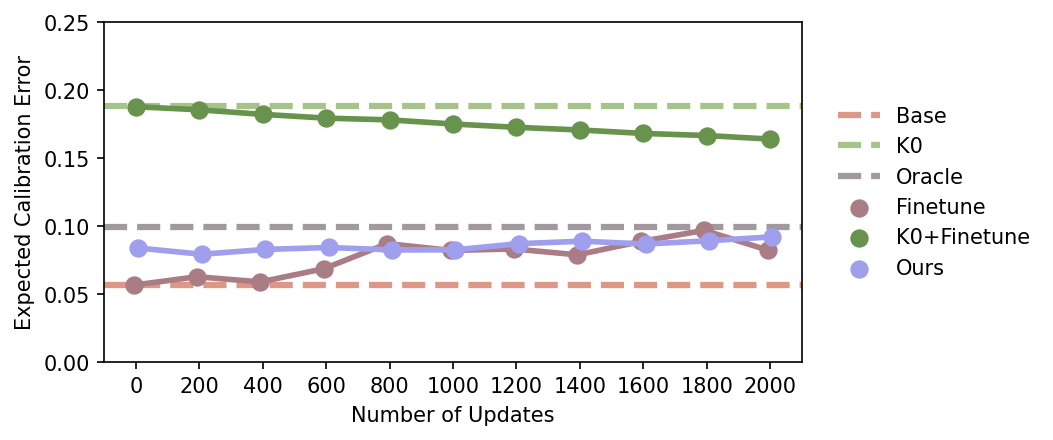

In [14]:
fig, ax = plt.subplots(dpi=150, figsize=(6, 3))

ax.axhline(y=base_ece, label="Base", ls="--", lw=3, c=AXHLINE_COLORS["Base"], zorder=0)
ax.axhline(y=k0_ece, label="K0", ls="--", lw=3, c=AXHLINE_COLORS["K0"], zorder=0)
ax.axhline(y=oracle_ece, label="Oracle", ls="--", lw=3, c=AXHLINE_COLORS["Oracle"], zorder=0)

sns.pointplot(x="num_updates", y="ece", data=combined_df, ax=ax,
              hue='method', hue_order=["Finetune", "K0+Finetune", "Ours"],
              dodge=True, palette=SEABORN_PALETTE)

ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, frameon=False)

ax.set_ylabel("Expected Calibration Error")
ax.set_xlabel("Number of Updates")

ax.set_ylim((0, 0.25))

fig.savefig(f"figures/peds_z12h_uncorrelated_offline_ece.pdf", bbox_inches="tight")

In [15]:
for calib_tuple in calib_list[1:]:
    num_updates, ours_calib, finetune_calib, k0_finetune_calib = calib_tuple
    
    if num_updates == 1:
        num_updates = 0
    
    if num_updates+1 in {1, 1000, 2000}:
        fig = make_calibration_plots(base_calib, k0_calib, oracle_calib, ours_calib, finetune_calib, k0_finetune_calib, num_updates+1)
        fig.savefig(f"figures/peds_calib_{num_updates+1}.pdf", bbox_inches="tight")
        plt.close(fig)

### nusc->lyft Online (Per-Agent) Relative Improvement

In [3]:
per_agent_rel_df = pd.read_csv("nuScenes/results/lyft_sample-mini_val_per_agent_online_rel.csv")
per_agent_rel_df.head()

,agent_ts,ml_ade,ml_fde,nll_mean,min_ade_5,min_ade_10,method
0,0,-43.557551,-54.720100,8.753862,-57.641509,-44.527813,Ours
1,10,-87.223662,-94.173197,-66.689303,-90.287081,-98.658768,Ours
2,20,-94.185852,-94.901566,-76.434758,-99.119944,-98.758533,Ours
3,30,-92.320299,-86.354879,-73.421944,-93.031822,-93.056891,Ours
4,40,-95.394970,-91.787186,-68.790754,-97.377725,-94.195786,Ours


In [4]:
metric_nice_name = {
    "ml_ade": "ADE Reduction",
    "ml_fde": "FDE Reduction",
    "nll_mean": "NLL Reduction",
    "min_ade_5": r"MinADE$_5$ Reduction",
    "min_ade_10": r"MinADE$_10$ Reduction"
}

In [5]:
import matplotlib.ticker as mtick

for idx, metric in enumerate(metrics_list):
    fig, ax = plt.subplots(dpi=150, figsize=(5, 3))

    sns.pointplot(x="agent_ts", y=metric, data=per_agent_rel_df[per_agent_rel_df["agent_ts"] % 20 == 0],
                  estimator=np.median, ax=ax, hue='method', hue_order=["Base", "Finetune", "K0", "K0+Finetune", "Ours", "Oracle"],
                  dodge=True, palette=SEABORN_PALETTE)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xlabel("Online-Observed Agent Timesteps")
    ax.set_ylabel(metric_nice_name[metric])
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, frameon=False)

    fig.savefig(f"figures/lyft_sample-mini_val_per_agent_online_rel_{metric}.pdf", bbox_inches="tight")
    plt.close(fig)

### nusc->lyft Offline Relative Improvement

In [6]:
import pickle
with open("nuScenes/results/base_performance.pkl", 'rb') as f:
    eval_dict = pickle.load(f)
    
horizontal_lines_eval_df = pd.DataFrame.from_dict(eval_dict)
horizontal_lines_eval_df.head()

,model,ml_ade,ml_fde,nll_mean,min_ade_5,min_ade_10
0,Base,85.192146,179.689346,7.990538,48.203312,38.243546
1,K0,48.293205,89.618462,10.895771,35.555500,25.114697
2,Oracle,2.160990,5.328506,0.737289,1.276416,1.021929


In [7]:
combined_df = pd.read_csv("nuScenes/results/lyft_sample-mini_val_uncorrelated_offline_rel.csv")
combined_df.head()

,num_updates,ml_ade,ml_fde,nll_mean,min_ade_5,min_ade_10,method
0,0,-29.710803,-53.296820,92.772924,-20.521161,-8.547958,Ours
1,0,-29.094611,-58.880934,74.810536,-22.884094,-9.315532,Ours
2,0,-28.584159,-53.432513,49.743920,12.059286,17.178284,Ours
3,0,-24.017335,-50.557376,2.771974,-20.433011,-8.295317,Ours
4,0,-29.159407,-56.622859,105.426162,-7.212882,16.969566,Ours


In [8]:
grouped_df = combined_df.groupby(by=["num_updates", "method"]).median().reset_index()

In [9]:
grouped_df = grouped_df[grouped_df.num_updates % 100 == 0]

In [10]:
grouped_df.head()

,num_updates,method,ml_ade,ml_fde,nll_mean,min_ade_5,min_ade_10
0,0,Finetune,-12.026027,-4.376442,-20.889703,-52.561789,-70.549008
1,0,K0+Finetune,-66.428852,-68.108198,16.141379,-70.330120,-78.470299
2,0,Ours,-44.816883,-50.095247,-22.122877,-52.482939,-60.356593
3,0,Ours+Finetune,-44.968026,-50.103677,-22.415813,-52.746138,-61.168342
8,100,Finetune,-45.387858,-39.956743,-53.768093,-88.648451,-88.731528


In [11]:
grouped_df.loc[:, metrics_list] -= grouped_df.loc[0, metrics_list]
grouped_df.head()

,num_updates,method,ml_ade,ml_fde,nll_mean,min_ade_5,min_ade_10
0,0,Finetune,0.0,0.0,0.0,0.0,0.0
1,0,K0+Finetune,-54.402824,-63.731756,37.031082,-17.768331,-7.921291
2,0,Ours,-32.790856,-45.718805,-1.233173,0.07885,10.192415
3,0,Ours+Finetune,-32.941999,-45.727235,-1.526109,-0.184348,9.380667
8,100,Finetune,-33.361831,-35.580302,-32.878389,-36.086662,-18.182519


In [12]:
metric_nice_name = {
    "ml_ade": "ADE Reduction",
    "ml_fde": "FDE Reduction",
    "nll_mean": "NLL Reduction",
    "min_ade_5": r"MinADE$_5$ Reduction",
    "min_ade_10": r"MinADE$_10$ Reduction"
}

In [13]:
import matplotlib.ticker as mtick

for idx, metric in enumerate(metrics_list):
    fig, ax = plt.subplots(dpi=150, figsize=(5, 3))

    # Base
    model_name = "Base"
    ax.axhline(y=grouped_df.loc[0, metric].item(), label=model_name, ls="--", lw=3, c=AXHLINE_COLORS[model_name], zorder=0)
    
    # K0
    model_name = "K0"
    ax.axhline(y=grouped_df.loc[1, metric].item(), label=model_name, ls="--", lw=3, c=AXHLINE_COLORS[model_name], zorder=0)
    
    # Oracle
    model_name = "Oracle"
    ref_val = horizontal_lines_eval_df.loc[0, metric].item()
    ax.axhline(y=100*(horizontal_lines_eval_df.loc[2, metric].item() - ref_val)/ref_val, label=model_name, ls="--", lw=3, c=AXHLINE_COLORS[model_name], zorder=0)

    sns.pointplot(x="num_updates", y=metric, data=grouped_df, ax=ax, hue='method', dodge=True, palette=SEABORN_PALETTE)

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xlabel("Number of Updates")
    ax.set_ylabel(metric_nice_name[metric])
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, frameon=False)

    fig.savefig(f"figures/lyft_sample-mini_val_uncorrelated_offline_rel_{metric}.pdf", bbox_inches="tight")
    plt.close(fig)

### nusc->lyft Offline Calibration

In [16]:
import pickle
with open(f"nuScenes/results/model_calibrations.pkl", 'rb') as f:
    calib_list = pickle.load(f)

In [17]:
def fraction_gt_included(thresholds: np.ndarray, est_gt_probs: np.ndarray):
    num_gt_points = est_gt_probs.shape[0]
    # Commenting this out, although it could be used to scale to the max PDF height.
    # No need though, without it we can see overconfidence easier.
    # max_pdf = est_gt_probs.max()
    
    return [(est_gt_probs >= threshold).sum() / num_gt_points for threshold in thresholds]

In [18]:
def calibration_plot(est_gt_probs: np.ndarray, method_name: str, ax):
    thresholds = np.linspace(0, 1, 101)
    
    num_gt_points = est_gt_probs.shape[0]
    # Commenting this out, although it could be used to scale to the max PDF height.
    # No need though, without it we can see overconfidence easier.
    # max_pdf = est_gt_probs.max()
    
    fraction_gt_incl = fraction_gt_included(thresholds, est_gt_probs)
    
    ax.plot(thresholds, fraction_gt_incl, label=method_name, lw=2, c=SEABORN_PALETTE[method_name])

In [19]:
def make_calibration_plots(base_calib, k0_calib, oracle_calib, ours_calib, ours_finetune_calib, finetune_calib, k0_finetune_calib, num_updates):
    fig, ax = plt.subplots(figsize=(4, 2.4))

    calibration_plot(base_calib, "Base", ax)
    calibration_plot(finetune_calib, "Finetune", ax)
    calibration_plot(k0_calib, "K0", ax)
    calibration_plot(k0_finetune_calib, "K0+Finetune", ax)
    calibration_plot(ours_calib, "Ours", ax)
    calibration_plot(ours_finetune_calib, "Ours+Finetune", ax)
    calibration_plot(oracle_calib, "Oracle", ax)
    ax.plot([0, 1], [1, 0], label="Ideal", ls="--", c="k", zorder=0)

    if num_updates == 1000:
        ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, frameon=False)
    
    ax.set_xlabel("Probability Threshold")
    
    if num_updates == 1:
        ax.set_ylabel("Fraction of GT Points")
    else:
        ax.set_ylabel(None)
        ax.set_yticklabels([])

    ax.grid(False)
    
    # ax.invert_yaxis()
    
    return fig

In [20]:
p1 = np.array([[0, 1]])
p2 = np.array([[1, 0]])
thresholds = np.linspace(0, 1, 101)

def expected_calibration_error(model_calib):
    calib_points_y = fraction_gt_included(thresholds, model_calib)
    p3s = np.stack([thresholds, calib_points_y], axis=1)
    distances = np.cross(p2-p1,p3s-p1)/np.linalg.norm(p2-p1)
    return np.abs(distances).sum()/101

In [21]:
_, base_calib, k0_calib, oracle_calib = calib_list[0]

In [22]:
base_ece = expected_calibration_error(base_calib)
k0_ece = expected_calibration_error(k0_calib)
oracle_ece = expected_calibration_error(oracle_calib)

In [23]:
num_updates = list()
ours_ece = list()
ours_finetune_ece = list()
finetune_ece = list()
k0_finetune_ece = list()

In [24]:
for calib_tuple in calib_list[1:]:
    data_sample, ours_calib, ours_finetune_calib, finetune_calib, k0_finetune_calib = calib_tuple
    
    ours_ece.append(expected_calibration_error(ours_calib))
    ours_finetune_ece.append(expected_calibration_error(ours_finetune_calib))
    finetune_ece.append(expected_calibration_error(finetune_calib))
    k0_finetune_ece.append(expected_calibration_error(k0_finetune_calib))
    
    num_updates.append(data_sample+1)

In [25]:
num_updates[0] = 0

In [26]:
num_steps = len(ours_ece)
combined_df = pd.DataFrame.from_dict({
    "method": ["Ours"]*num_steps + ["Ours+Finetune"]*num_steps + ["Finetune"]*num_steps + ["K0+Finetune"]*num_steps,
    "num_updates": num_updates*4,
    "ece": ours_ece + ours_finetune_ece + finetune_ece + k0_finetune_ece,
})

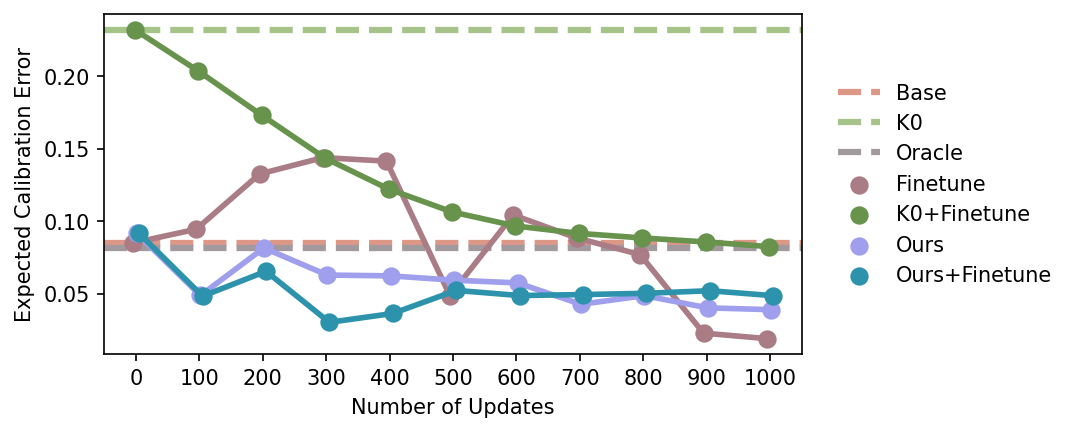

In [27]:
fig, ax = plt.subplots(dpi=150, figsize=(6, 3))

ax.axhline(y=base_ece, label="Base", ls="--", lw=3, c=AXHLINE_COLORS["Base"], zorder=0)
ax.axhline(y=k0_ece, label="K0", ls="--", lw=3, c=AXHLINE_COLORS["K0"], zorder=0)
ax.axhline(y=oracle_ece, label="Oracle", ls="--", lw=3, c=AXHLINE_COLORS["Oracle"], zorder=0)

sns.pointplot(x="num_updates", y="ece", data=combined_df, ax=ax,
              hue='method', hue_order=["Finetune", "K0+Finetune", "Ours", "Ours+Finetune"],
              dodge=True, palette=SEABORN_PALETTE)

ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, frameon=False)

ax.set_ylabel("Expected Calibration Error")
ax.set_xlabel("Number of Updates")

fig.savefig(f"figures/lyft_sample-mini_val_uncorrelated_offline_ece.pdf", bbox_inches="tight")

In [28]:
for calib_tuple in calib_list[1:]:
    num_updates, ours_calib, ours_finetune_calib, finetune_calib, k0_finetune_calib = calib_tuple
    
    if num_updates == 1:
        num_updates = 0
    
    if num_updates+1 in {1, 500, 1000}:
        fig = make_calibration_plots(base_calib, k0_calib, oracle_calib, ours_calib, ours_finetune_calib, finetune_calib, k0_finetune_calib, num_updates+1)
        fig.savefig(f"figures/lyft_calib_{num_updates+1}.pdf", bbox_inches="tight")
        plt.close(fig)